In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#functions from task description

def R2(y_data, y_model): #score function
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model): #mean square error
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#from lecture notes on Ridge/Lasso regression
def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

In [87]:
# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_, y_ = np.meshgrid(x,y)

noise = np.random.normal(0, 0.1, len(x_)*len(x_)) #
noise = noise.reshape(len(x_), len(x_)) #why?

z = FrankeFunction(x_, y_) + noise #Franke with noise

<IPython.core.display.Javascript object>


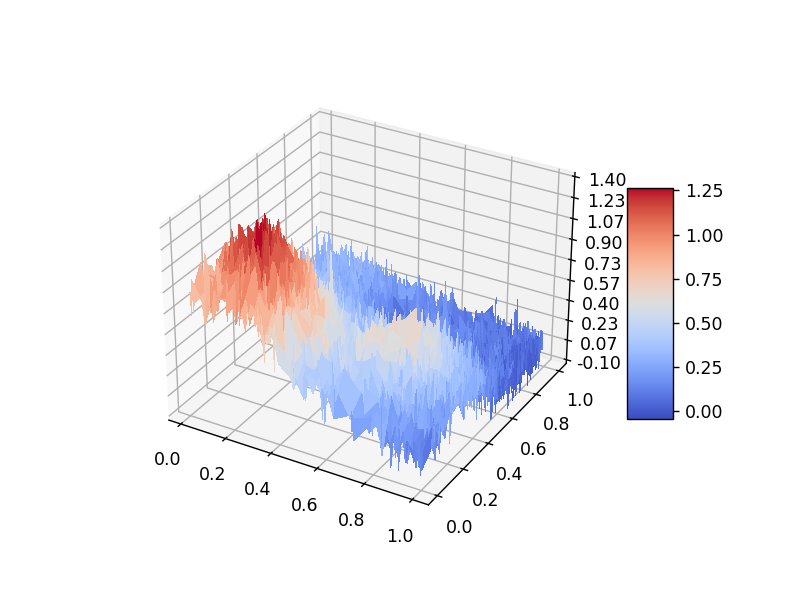

In [88]:
%matplotlib notebook

# Plot the surface.
fig = plt.figure()
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x_, y_, z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
#linewidth = 0, antialiased = False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [89]:
X = create_X(x, y, n)

# We split the data in test and training data, 20%
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
print(beta)

Features/Length beta: 21
[[ 5.54227071e-01  1.13425759e+00  3.98939285e-01 ... -1.55877555e-01
   5.81460096e-01  8.38423277e-02]
 [ 2.66267353e+01 -3.48806246e+01  4.35537451e+01 ...  2.53795222e+01
  -3.45247213e+01  8.06550629e-01]
 [-1.71087697e+01  3.09468709e+01 -4.04417840e+01 ... -1.85420297e+01
   2.48050345e+01  1.70171970e+00]
 ...
 [-1.19000820e+06  7.32763321e+05 -2.35448411e+05 ... -5.05267923e+04
  -1.03989332e+06  3.03483336e+05]
 [ 6.26432873e+05 -3.66472935e+05  1.17750005e+05 ... -1.42675044e+04
   5.50506849e+05 -1.59441209e+05]
 [-1.29771165e+05  7.26127551e+04 -2.65054967e+04 ...  1.19275826e+04
  -1.15684076e+05  3.29047849e+04]]


In [90]:
#scikit 
linreg = LinearRegression()
linreg.fit(X,z)

zpredict = linreg.predict(X)


# and then make the prediction
ztilde = X_train @ beta
print("Training R2")
print(R2(z_train, ztilde))
print("Training MSE")
print(MSE(z_train, ztilde))

zpredict = X_test @ beta
print("Test R2")
print(R2(z_test, zpredict))
print("Test MSE")
print(MSE(z_test, zpredict))

Training R2
0.9000989603226243
Training MSE
0.008143793652105923
Test R2
0.7996724049475743
Test MSE
0.017697660897153144
